# 🔻 [Return to workflow](#leftoff)

⚓ ANCHOR FOR RETURN TO WORKFLOW LINK <a name="leftoff"></a>

# 🏡 **“ODD” ASPECTS OF AIRBNB** 🏨

# ❌ Update target audience and guiding questions

---

**Who?**
>* 🏢 **AirBNB Corporate** interested in maximizing customer satisfaction to increase repeat guests and encourage new guests to stay with AirBNB hosts
>
>
>* 🏡**AirBNB hosts** interested in maximizing the ratings

**Why?**
>* 💰 **Revenue Management:** 
>
>
>
>* 🤝 **Sales:**
>
>
>
>* 🛌 **Rooms Ops:**

>
>
>

**What?**
>* 🧾 Dataset comprised of... 
>  * different features
>  * reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods?
>* Data prep and feature engineering

---

# 🎯  **Goal:**

Determining whether or not a host location would receive a score greater than or equal to 4/5 (defined by `'review_scores_rating'`).

# 📌 **To-Do**

---

- [ ] [TD1](#td1)
- [ ] [TD2](#td2)
- [ ] [TD3](#td3)
- [ ] [todo4](#td4)
- [ ] [todo5](#td5)
- [ ] [todo6](#td6)
- [ ] [todo7](#td7)

---

# 📂 **Imports and Settings**

In [1]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats


## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## Modeling - SKLearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.preprocessing import Binarizer, MultiLabelBinarizer, \
                                    OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn import set_config
set_config(display='diagram')

from imblearn.over_sampling import SMOTE,SMOTENC

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

In [2]:
## Personal functions
import clf_functions.functions as cf
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

## ✅ Show Visualizations Setting

In [3]:
## Controlling whether or not to show visualizations
show_visualizations = False

## ❓ FSDS

In [4]:
# import fsds as fs

In [5]:
# fs.ihelp_menu([fs.ihelp_menu, sort_report])

# 📖 **Read Data**

In [6]:
## Reading data and saving to a DataFrame

source = 'data/listings.csv.gz'

data = pd.read_csv(source)

In [7]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [8]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 👨‍💻 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns.
>
> **Only click the "Drop_Cols" option when specifying "Cols"!** Otherwise it will cause an error.
>
>The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [9]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

In [10]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

---

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta data) or values that are too complicated for simple processing (such as host and listing descriptions).
>
> I will drop these columns for the second report to review the remaining data for further processing.

---

In [11]:
## Specifying columns to drop

drop = ['id', 'host_id', 'name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'host_location', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [12]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> * I could **use the `SimpleImputer` tool from SKLearn to fill the missing values** with the mean, median, or mode values for each.
>    * *I could couple this with a `GridSearchCV` to identify the method that has the strongest positive impact on my classification metrics.*

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

In [13]:
## Visually inspecting missing values
if show_visualizations == True:
    missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## 🔎 Fixing Missing Values

---

> This dataset is missing a significant number of values for different columns. **In order to perform any modeling, I will need to address these missing values first.**
>
> Depending on the feature and the number of missing values per row, I will take different approaches to keep as much data as possible and in its original state.

---

In [14]:
# Dropping features with high percentages (25%+) of missing values

drop_na_cols = []
for col in data.columns:
    if ((data[col].isna().sum()) / len(data[col])) > .25 and col != 'review_scores_rating':
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [15]:
## Appending previous list of columns to drop (metadata, etc.)

for col in drop:
    if col not in drop_na_cols:
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month',
 'id',
 'host_id',
 'name',
 'description',
 'host_name',
 'host_location',
 'property_type',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'calendar_last_scraped']

In [16]:
## Creating new dataframe that does not include the features to drop
df = data.drop(columns= drop_na_cols).copy()
df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [17]:
## Inspecting values prior to dropping
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,136,0.02,object,2415,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,741,0.09,object,183,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,0,0.00,object,297,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0,0.00,float64,5113,"8,033.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


# Dropping rows missing target

In [18]:
## Checking for row s missing values

nan_index = df['review_scores_rating'].isna()
nan_index

0       False
1       False
2       False
3       False
4       False
        ...  
8028     True
8029     True
8030     True
8031     True
8032     True
Name: review_scores_rating, Length: 8033, dtype: bool

In [19]:
## Inspecting rows to be dropped for missing the target feature
df[nan_index]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
40,2011-07-22,f,Manor Park,2.00,2.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Takoma, Brightwood, Manor Park",38.96,-77.02,Private room,1,1.5 shared baths,1.00,4.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$399.00,1,730,1,1,730,730,1.00,730.00,t,30,60,90,365,0,0,0,nan,f,2,1,1,0
70,2012-01-25,f,Near Northeast,2.00,2.00,"['email', 'phone']",t,f,"Union Station, Stanton Park, Kingman Park",38.90,-77.00,Entire home/apt,4,2 baths,2.00,2.00,"[""Refrigerator"", ""Long term stays allowed"", ""C...",$125.00,5,1125,5,5,1125,1125,5.00,"1,125.00",t,17,38,68,343,0,0,0,nan,f,2,2,0,0
80,2012-04-24,f,Logan Circle,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.91,-77.03,Entire home/apt,1,1.5 baths,1.00,1.00,"[""Elevator"", ""Cable TV"", ""TV with standard cab...",$99.00,150,1125,150,150,1125,1125,150.00,"1,125.00",t,29,59,89,364,0,0,0,nan,f,1,1,0,0
120,2009-11-26,f,Capitol Hill,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Capitol Hill, Lincoln Park",38.89,-76.99,Entire home/apt,6,NaN,3.00,nan,[],"$2,000.00",4,4,4,4,4,4,4.00,4.00,t,30,60,90,365,0,0,0,nan,f,1,1,0,0
145,2013-04-24,f,Adams Morgan,1.00,1.00,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,2 baths,2.00,2.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$120.00,180,180,180,180,180,180,180.00,180.00,f,0,0,0,0,0,0,0,nan,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [20]:
## Checking number of remain

len(df) - df['review_scores_rating'].isna().sum()

5826

In [21]:
## 
df.drop(df[nan_index].index, inplace=True)

In [22]:
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,10,0.00,object,2164,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,488,0.08,object,169,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_total_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_verifications,0,0.00,object,269,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0,0.00,float64,4077,"5,826.00",38.91,0.02,38.82,38.90,38.91,38.92,38.99


In [23]:
## Filling missing values for 'beds' with values for 'bedrooms'

for idx in list(df['beds'][df['beds'].isna()].index):
    if df['bedrooms'][idx] > 0:
        df['beds'][idx] = df['bedrooms'][idx]

<ipython-input-23-736ac37997da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'][idx] = df['bedrooms'][idx]


In [24]:
## Filling missing values for 'bedrooms' with values for 'beds'

for idx in list(df['bedrooms'][df['bedrooms'].isna()].index):
    if df['beds'][idx] > 0:
        df['bedrooms'][idx] = df['beds'][idx]

<ipython-input-24-ae0f6b239e0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'][idx] = df['beds'][idx]


In [25]:
## Confirming reduction in missing values for 'beds' and 'bedrooms'

rpt_clean  = cf.report_df(df)
rpt_clean[rpt_clean['null_sum'] >0]

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,10,0.00,object,2164,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,488,0.08,object,169,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_total_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_has_profile_pic,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms_text,4,0.00,object,25,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,71,0.01,float64,9,"5,755.00",1.51,0.90,1.00,1.00,1.00,2.00,9.00
beds,1,0.00,float64,16,"5,825.00",1.90,1.44,0.00,1.00,1.00,2.00,19.00


In [26]:
## Removing rows with 6+ null values

df = df[df.isna().sum(axis=1) < 6]
df.head(5)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0


In [27]:
df.isna().sum()

host_since                                        0
host_is_superhost                                 0
host_neighbourhood                              478
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
room_type                                         0
accommodates                                      0
bathrooms_text                                    4
bedrooms                                         71
beds                                              1
amenities                                         0
price                                             0
minimum_nights                                    0
maximum_nigh

In [28]:
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,0,0.00,object,2164,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,478,0.08,object,169,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,0,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_total_listings_count,0,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_verifications,0,0.00,object,268,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0,0.00,float64,4073,"5,816.00",38.91,0.02,38.82,38.90,38.91,38.92,38.99


In [29]:
## Resetting the index after dropping rows

df.reset_index(drop=True, inplace=True)

In [30]:
print(len(df) == len(df.index),"\n")
print(len(df),len(df.index))

True 

5816 5816


---

> At this point, **I cleaned up most of the null values via dropping columns with 25%+ missing values and dropping rows with 6+ missing values.**
>
>Additionally, **I filled missing values for 'beds'/'bedrooms' by checking the missing values for each column against the values in the other for each row.** If a row had a value in one of the columns but not the other, I filled the missing value with the value from the other column.
>
> At this point, I addressed most of the missing values in my dataset by dropping columns and filling missing values. There are still a few columns with missing values, but I will use a SimpleImputer combined with a GridSearchCV to determine the best method by which to fill those values.
>
> Now I will review the remaining data and determine if there are any other issues with my data.

---

In [31]:
len(df) == len(df.index)

True

# **COMMENT:** What else to clean?? 

* DONE: T/F columns to 1/0


* DONE: 'host_since' to DT


* DONE: 'price' -$, to float


* DONE: 'neighbourhood_cleansed' split on ", " and convert to binary columns, then drop host_neighbourhood


* DONE: 'bathrooms_text' split on space, keep 1st part, convert to int


* 'host_verifications' - single string, needs extensive work in order to MLB

## Converting True/False Columns to Binary Values

In [32]:
## Creating list of true/false features to convert to 1/0, respectively

t_f_xf = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
          'has_availability','instant_bookable']
t_f_xf

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [33]:
## Converting datatype to "string" to replace values

df[t_f_xf] = df[t_f_xf].astype('str')
df[t_f_xf].dtypes

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


host_is_superhost         object
host_has_profile_pic      object
host_identity_verified    object
has_availability          object
instant_bookable          object
dtype: object

In [34]:
df[t_f_xf]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,f
1,f,t,t,t,f
2,f,t,t,t,f
3,t,t,t,t,f
4,f,t,t,t,f
...,...,...,...,...,...
5811,f,t,t,t,f
5812,f,t,t,t,f
5813,t,t,t,t,t
5814,f,t,f,t,f


In [35]:
## Converting t/f to 1/0, respectively

df[t_f_xf] = df[t_f_xf].replace({ 't' : 1, 'f' : 0})

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df[t_f_xf]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,1,1,1,1,0
4,0,1,1,1,0
...,...,...,...,...,...
5811,0,1,1,1,0
5812,0,1,1,1,0
5813,1,1,1,1,1
5814,0,1,0,1,0


In [37]:
df[t_f_xf] = df[t_f_xf].astype(int)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
## Verifying results

cf.report_df(df[t_f_xf])

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_is_superhost,0,0.00,int32,2,"5,816.00",0.33,0.47,0.00,0.00,0.00,1.00,1.00
host_has_profile_pic,0,0.00,int32,2,"5,816.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
host_identity_verified,0,0.00,int32,2,"5,816.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
has_availability,0,0.00,int32,2,"5,816.00",0.98,0.14,0.00,1.00,1.00,1.00,1.00
instant_bookable,0,0.00,int32,2,"5,816.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00


## Converting Price to Float 

In [39]:
## Converting each value into a float for processing

df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')
df['price'][0]

<ipython-input-39-64fcc6d81799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')


55.0

In [40]:
df['price'].describe()

count    5,816.00
mean       149.96
std        225.75
min          0.00
25%         77.00
50%        108.00
75%        163.00
max     10,000.00
Name: price, dtype: float64

## Creating "Years_Hosting"

---

> Since the 'host_since' feature is clearly a date, I will create a separate feature for how many years of activity for each host.

---

In [41]:
df['years_hosting'] = df["host_since"].map(lambda x: 2021- int(x.split("-")[0]))
df['years_hosting']

<ipython-input-41-111cfbd782bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_hosting'] = df["host_since"].map(lambda x: 2021- int(x.split("-")[0]))


0       13
1       13
2       13
3       12
4       12
        ..
5811     7
5812     9
5813    10
5814     2
5815     2
Name: years_hosting, Length: 5816, dtype: int64

In [42]:
df['years_hosting'].value_counts()

6     1226
5      961
7      803
8      641
4      492
9      379
3      351
2      292
10     227
0      142
1      138
11      79
12      66
13      19
Name: years_hosting, dtype: int64

In [43]:
df['years_hosting'].describe()

count   5,816.00
mean        5.89
std         2.45
min         0.00
25%         5.00
50%         6.00
75%         7.00
max        13.00
Name: years_hosting, dtype: float64

---

> I successfully created the new feature to represent how long each host is active (up to 2021). I will be curious to see the impact of the years of experience on the overall rating at the end of my modeling process.

---

## Bathrooms_Text to Num_Bathrooms

---

> In the raw data, the original "bathrooms" feature was empty and was dropped as part of processing missing data.
>
> **My goal is to convert the "bathrooms_text" feature into a new "num_bathrooms" feature to indicate the number of bathrooms at a host property.**
>
> I assume the number of bathrooms would have an impact on the rating . More bathrooms could mean more space/comfort for the guest, but could also cause an increase in price.


---

In [44]:
## Checking current dataframe contents
df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting
0,2008-11-26,0,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,13
1,2008-12-12,0,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,13
2,2008-12-30,0,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,13


In [45]:
## Checking for null values overall
df.isna().sum()[df.isna().sum() > 0]

host_neighbourhood    478
bathrooms_text          4
bedrooms               71
beds                    1
dtype: int64

In [46]:
## Inspecting a selection of values from the column to understand the values
df.loc[:,'bathrooms_text'][:21]

0       1 private bath
1     1.5 shared baths
2        1 shared bath
3              3 baths
4               1 bath
5               1 bath
6        1 shared bath
7               1 bath
8               1 bath
9     1.5 shared baths
10              1 bath
11    1.5 shared baths
12      1 private bath
13              1 bath
14    1.5 shared baths
15      1 private bath
16       1 shared bath
17           2.5 baths
18      1 private bath
19              1 bath
20                 NaN
Name: bathrooms_text, dtype: object

In [47]:
## Inspecting the rows in which there are null values
df[df['bathrooms_text'].isna()]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting
20,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,NaN,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,4.85,0,1,1,0,0,11
25,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,4.89,0,3,0,3,0,12
26,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,4.90,0,3,0,3,0,12
4782,2019-08-22,0,U Street Corridor,0.00,0.00,"['email', 'phone']",1,1,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.03,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""O...",0.00,1,365,1,1,365,365,1.00,365.00,1,0,0,0,0,33,19,7,4.36,0,3,0,0,2,2


In [48]:
## Filling null values with unique string ('Baths' not present otherwise)
## Unique string can be used later to check for any other zero baths

df.loc[:,'bathrooms_text'].fillna('0 Baths', inplace=True)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
## Verifying all null values are filled
df.isna().sum()[df.isna().sum() > 0]

host_neighbourhood    478
bedrooms               71
beds                    1
dtype: int64

In [50]:
df.loc[:,'bathrooms_text'].isna().sum()

0

In [51]:
## Splitting each list into separate strings
df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])
df['num_bathrooms'].value_counts()

<ipython-input-51-926c4f5fca7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])


1            4180
2             565
1.5           464
2.5           330
3.5           106
3              91
4              30
4.5            20
0              14
5.5             5
5               3
6               2
6.5             2
11              2
Half-bath       1
Shared          1
Name: num_bathrooms, dtype: int64

In [52]:
## Inspecting results that are phrases, not numbers

replace = ['Half-bath', 'Shared', 'Private']

for x in df['bathrooms_text']:
    for i in replace:
        if i in x:
            print(x)

Shared half-bath
Half-bath


---

> **I will replace these values with the numeric value .5 as they are half-baths.** This will allow me to convert the column datatype to a float and use the column more easily in my modeling.

---

In [53]:
## Replacing string values with .5 to represent half-bathrooms

replace = {'Half-bath': .5, 'Shared': .5, 'Private': .5}

df['num_bathrooms'].replace(replace, inplace = True)

df['num_bathrooms'] = df['num_bathrooms'].astype(float)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-53-36f8771ec030>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_bathrooms'] = df['num_bathrooms'].astype(float)


In [54]:
## Inspecting resulting values

df['num_bathrooms'].value_counts(dropna=False)

1.00     4180
2.00      565
1.50      464
2.50      330
3.50      106
3.00       91
4.00       30
4.50       20
0.00       14
5.50        5
5.00        3
6.50        2
0.50        2
11.00       2
6.00        2
Name: num_bathrooms, dtype: int64

In [55]:
## Inspecting listings with more than 10 rooms

df[df['num_bathrooms'] >10]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms
1271,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,6.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,1,31,13,13,91,91,13.00,91.00,1,0,0,0,0,7,1,0,4.86,1,3,0,1,2,5,11.00
5039,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,3.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,7,180,13,13,91,91,13.00,91.00,1,0,0,0,0,6,6,0,4.17,1,3,0,1,2,5,11.00


---

> After taking a look at the locations listed above on Google Maps (using their latitude/longitude), I feel like these three listings with more than 10 bathrooms are either duplicates or incorrect values (for 50 baths).
>
> Due to the questionable nature of these values, I will drop these rows to prevent these outliers from impacting my results.

---

In [56]:
## Inspecting rows where 'num_bathrooms' is zero to validate data

df[df['num_bathrooms'] ==0]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms
20,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,0 Baths,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,4.85,0,1,1,0,0,11,0.00
25,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,4.89,0,3,0,3,0,12,0.00
26,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,4.90,0,3,0,3,0,12,0.00
467,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Long term stays allowed"", ""Essentials"", ""Hea...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,159,0,0,4.69,0,8,0,8,0,6,0.00
468,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Long t...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,231,0,0,4.59,0,8,0,8,0,6,0.00
469,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,1,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",95.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,256,0,0,4.56,0,8,0,8,0,6,0.00
1095,2015-08-07,0,Petworth,3.00,3.00,"['email', 'phone', 'reviews', 'kba']",1,0,"Brightwood Park, Crestwood, Petworth",38.94,-77.02,Private room,1,0 shared baths,1.00,1.00,"[""Kitchen"", ""Carbon monoxide alarm"", ""Keypad"",...",65.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,30,60,90,365,43,0,0,4.86,0,3,0,3,0,6,0.00
1493,2013-09-09,1,NaN,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"North Cleveland Park, Forest Hills, Van Ness",38.94,-77.06,Private room,2,0 shared baths,nan,0.00,"[""Elevator"", ""Dedicated workspace"", ""Long term...",150.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,9,284,25,0,0,5.00,0,1,0,1,0,8,0.00
1853,2015-11-18,0,Shaw,3.00,3.00,"['email', 'phone', 'reviews', 'offline_governm...",1,1,"Shaw, Logan Circle",38.91,-77.02,Private room,2,0 baths,1.00,1.00,"[""Dedicated workspace"", ""Long term stays allow...",90.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,2,0,0,5.00,0,2,1,1,0,6,0.00
2710,2011-11-23,0,Anacostia,1.00,1.00,"['email', 'phone', 'facebook', 'reviews', 'wor...",1,0,Historic Anacostia,38.86,-76.98,Private room,1,0 shared baths,1.00,1.00,"[""Shampoo"", ""Hot water"", ""Security cameras on ...",50.00,2,420,2,2,420,420,2.00,420.00,1,0,0,0,0,6,0,0,5.00,0,1,0,1,0,10,0.00


In [57]:
## Removing old column post-conversion

df = df.drop(columns = 'bathrooms_text')

In [58]:
## Confirming removal

'bathrooms_text' in df.columns

False

---

> My review of the original bathroom text for the zero bathrooms column shows that the listings are associated with a private room. This would make sense as the listings may not include an option such as a shared bath, etc..
>
> Additionally I did fill 9 instances of missing values with "0 Baths," which would contribute slightly to this count.
>
> Overall, I feel the data is valid and I will use it for my modeling.

---

## Cleaning Room_Type

In [59]:
df['room_type'].value_counts()

Entire home/apt    4311
Private room       1381
Shared room          98
Hotel room           26
Name: room_type, dtype: int64

In [60]:
replace_rooms = {'Entire home/apt': 'entire_home', 
                 'Private room': 'private_room',
                 'Shared room': 'shared_room',
                 'Hotel room': 'hotel_room'
                }

df['room_type'].replace(replace_rooms, inplace=True)
df['room_type'].value_counts(dropna=False)

entire_home     4311
private_room    1381
shared_room       98
hotel_room        26
Name: room_type, dtype: int64

## Binarizing Neighbourhood_Cleansed

---

> The current values for "neighbourhood_cleansed" are a single string value. **I will separate each neighborhood and convert them into a binary column to represent whether or not that neighborhood is included in the listing, then drop the old column.**

---

In [61]:
## Inspecting feature
df.loc[:,'neighbourhood_cleansed']

0                                      Historic Anacostia
1       Edgewood, Bloomingdale, Truxton Circle, Eckington
2                            Eastland Gardens, Kenilworth
3          Ivy City, Arboretum, Trinidad, Carver Langston
4          Kalorama Heights, Adams Morgan, Lanier Heights
                              ...                        
5811    Edgewood, Bloomingdale, Truxton Circle, Eckington
5812    Edgewood, Bloomingdale, Truxton Circle, Eckington
5813    Columbia Heights, Mt. Pleasant, Pleasant Plain...
5814    Friendship Heights, American University Park, ...
5815       Ivy City, Arboretum, Trinidad, Carver Langston
Name: neighbourhood_cleansed, Length: 5816, dtype: object

In [62]:
## Identifying datatype
df.loc[:,'neighbourhood_cleansed'].dtype

dtype('O')

In [63]:
## Testing the splitting between neighborhoods

df.loc[:,'neighbourhood_cleansed'][1].split(', ')

['Edgewood', 'Bloomingdale', 'Truxton Circle', 'Eckington']

In [64]:
## Converting values into a list of strings of neighborhoods

df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'] \
                                    .apply(lambda x: x.split(', '))

display(df.loc[:,'neighbourhood_cleansed'])

0                                    [Historic Anacostia]
1       [Edgewood, Bloomingdale, Truxton Circle, Eckin...
2                          [Eastland Gardens, Kenilworth]
3        [Ivy City, Arboretum, Trinidad, Carver Langston]
4        [Kalorama Heights, Adams Morgan, Lanier Heights]
                              ...                        
5811    [Edgewood, Bloomingdale, Truxton Circle, Eckin...
5812    [Edgewood, Bloomingdale, Truxton Circle, Eckin...
5813    [Columbia Heights, Mt. Pleasant, Pleasant Plai...
5814    [Friendship Heights, American University Park,...
5815     [Ivy City, Arboretum, Trinidad, Carver Langston]
Name: neighbourhood_cleansed, Length: 5816, dtype: object

---

> The following code snippet is adapted from [here](https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list#:~:text=Sparse%20solution%20(for%20Pandas%20v0.25.0%2B)) by the user [Maxu](https://stackoverflow.com/users/5741205/maxu).

---

In [65]:
## Converting each neighborhood into a binary column and dropping old column

mlb = MultiLabelBinarizer()

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('neighbourhood_cleansed')),
                              columns=mlb.classes_,index=df.index))

In [66]:
## Inspecting results

df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge
0,2008-11-26,0,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,38.86,-76.99,private_room,1,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-12-12,0,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",1,1,38.91,-77.00,private_room,2,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,13,1.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,38.91,-76.94,private_room,4,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

---

> After using the MultiLabelBinarizer, I successfully added a column for each neighborhood, indicating whether or not that neighborhood was included in the listing.
>
> This enables me to use the presence/absence of a  neighborhood as a category in my modeling.

---

## Host_Verifications to Binary Columns

---

> For the "host_verifications" and "amenities" features, the values are a single string with several items within the string.
>
> It is somewhat similar to the "neighborhoods_cleaned" feature in the sense that I will need to filter out the individual items from the string. However, there is an added complication as I need to remove the brackets and quotations from the strings.
>
> Once I filter out the items, I will be able to use the MultiLabelBinarizer again to create more categories for each amenity.

---

In [67]:
## Inspecting contents
df['host_verifications'][:10]

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1                 ['email', 'phone', 'reviews', 'kba']
2    ['email', 'phone', 'facebook', 'reviews', 'jum...
3                 ['email', 'phone', 'reviews', 'kba']
4    ['email', 'phone', 'facebook', 'reviews', 'jum...
5    ['email', 'phone', 'reviews', 'offline_governm...
6    ['email', 'phone', 'facebook', 'reviews', 'jum...
7    ['email', 'phone', 'facebook', 'reviews', 'off...
8                 ['email', 'phone', 'reviews', 'kba']
9                 ['email', 'phone', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [68]:
## Testing the splitting between items

df.loc[:,'host_verifications'][1]

"['email', 'phone', 'reviews', 'kba']"

In [69]:
## Removing e'host_verifications'tra characters and splitting items

df['host_verifications'] = df['host_verifications'].str.replace('[', '')
df['host_verifications'] = df['host_verifications'].str.replace(']', '')
df['host_verifications'] = df['host_verifications'].str.replace("'", '')
df['host_verifications'] = df['host_verifications'].str.replace('"', '')
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.split(', '))

In [70]:
df['host_verifications']

0       [email, phone, reviews, jumio, offline_governm...
1                            [email, phone, reviews, kba]
2       [email, phone, facebook, reviews, jumio, gover...
3                            [email, phone, reviews, kba]
4       [email, phone, facebook, reviews, jumio, offli...
                              ...                        
5811    [email, phone, jumio, offline_government_id, g...
5812        [email, phone, reviews, jumio, government_id]
5813    [email, phone, reviews, offline_government_id,...
5814                                       [email, phone]
5815    [phone, offline_government_id, selfie, governm...
Name: host_verifications, Length: 5816, dtype: object

In [71]:
## Converting each value into a binary column and dropping old column

mlb2 = MultiLabelBinarizer()
    
df = df.join(pd.DataFrame(mlb2.fit_transform(df.pop('host_verifications')),
                                  columns=mlb2.classes_,index=df.index))

df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email
0,2008-11-26,0,Anacostia,2.00,2.00,1,1,38.86,-76.99,private_room,1,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1
1,2008-12-12,0,Eckington,0.00,0.00,1,1,38.91,-77.00,private_room,2,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,13,1.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,1,1,38.91,-76.94,private_room,4,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

---

> At this point, I successfully processed the 'host_verification' feature into distinct categories for modeling.
>
> In the future, I may attempt to do the same for the 'amenities' feature, but I don't want to create too many columns before my initial modeling.

---

## ❌ ERROR ❌ Binarizing Room_Type

---

> **Can't get MLB/OHE to work for individual property types.**

---

In [72]:
# df['room_type'].describe()

In [73]:
# df['room_type'].value_counts(dropna=False)

In [74]:
# df['room_type'] = df['room_type'].replace('Entire home/apt', 'Home/Apt')

In [75]:
# df['room_type'] = df['room_type'].map(lambda x: x.split(' ')[0])

In [76]:
# df['room_type'].value_counts(dropna=False)

In [77]:
# ohe = OneHotEncoder(sparse=False)

# df_ohe = ohe.fit_transform([df['room_type']])
# df_ohe

In [78]:
# pd.DataFrame(df_ohe)

## ❌ ERROR ❌ Converting Amenities


---

> same issue as w/ room type

---

In [79]:
# for x in ['host_verifications', 'amenities']:
#     print(df[x])

In [80]:
# df['amenities'][:10]

In [81]:
# for x in ['host_verifications', 'amenities']:
#     df[x] = df[x].str.replace('and', '')

In [82]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [83]:
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace('[', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace(']', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace("'", '')

In [84]:
# df.loc[:,'host_verifications']

In [85]:
# df['amenities'] = df['amenities'].str.replace('[', '')
# df['amenities'] = df['amenities'].str.replace(']', '')
# df['amenities'] = df['amenities'].str.replace('"', '')

In [86]:
# df['amenities']

In [87]:
# df['amenities'] = df['amenities'].apply(lambda x: x.split(', '))

In [88]:
# df['amenities'][0]

In [89]:
# df['host_verifications'] = df['host_verifications'].apply(lambda x: x.split(', '))

In [90]:
# df['host_verifications'][0][0]

In [91]:
# def convert_to_col(df, list_cols):
#     '''For a given list of column names, separates each string value in the
#     column by the comma/space pattern to return new strings of single values.
    
#     Then, instantiates a MultiLabelBinarizer to create new columns for each 
#     new string to indicate the presence or absence of that string in the 
#     original column.'''
    
# #     mlb = MultiLabelBinarizer()
    
#     for x in list_cols:
#         try:
#             df[x] = df[x].apply(lambda x: x.split(', '))
#             print(f'Successfully split values in column "{x}"')
            
#         except Exception:
#             print('\nValues are already processed and saved.')
#             print(f"\nSample value: {df.loc[:,x][3]}")
            
# #         try:
# #             df = df.join(pd.DataFrame(mlb.fit_transform(df.pop(x)),
# #                                       columns=mlb.classes_,index=df.index))
# #         except Exception:
# #                 print('\nValues are already processed and saved.')
                
#     return df

In [92]:
# binarize_cols = ['host_verifications', 'amenities'] 

# convert_to_col(df, binarize_cols)

In [93]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [94]:
# # mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [95]:
# ## Converting values into a list of strings for each neighborhood

# try:
#     df['host_verifications'] = df['host_verifications'] \
#                                                 .apply(lambda x: x.split(', '))
#     display(df.loc[:,'host_verifications'])
# except Exception:
#     print('\nValues are already processed and saved. No changes necessary.')
#     print(f"\nSample value: {df.loc[:,'host_verifications'][3]}")
    
    

In [96]:
# ## Inspecting results

# df.head(3)

In [97]:
# test3 = df['host_verifications'][0]
# test3[1:-1].replace('"', "'").split(",")

In [98]:
# # df['Tags'] = df.Tags.apply(lambda x: x[1:-1].split(','))

# df['host_verifications'].apply(lambda x: x.split(','))[0]

# Pre-Pipeline Review

In [99]:
## Review remaining data
df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email
0,2008-11-26,0,Anacostia,2.00,2.00,1,1,38.86,-76.99,private_room,1,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1
1,2008-12-12,0,Eckington,0.00,0.00,1,1,38.91,-77.00,private_room,2,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,13,1.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,1,1,38.91,-76.94,private_room,4,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,13,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [100]:
## Removing columns with no impact on modeling

df.drop(columns = ['host_since', 'host_neighbourhood', 'amenities'], inplace=True)

In [101]:
## Final review

df.describe()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,years_hosting,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email
count,"5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,745.00","5,815.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00","5,816.00",

## Converting Remaining Datatypes

In [102]:
df.dtypes[:40]

host_is_superhost                                 int32
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                              int32
host_identity_verified                            int32
latitude                                        float64
longitude                                       float64
room_type                                        object
accommodates                                      int64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                            int64
maximum_minimum_nights                            int64
minimum_maximum_nights                            int64
maximum_maximum_nights                          

In [103]:
df.isna().sum()[df.isna().sum() > 0]

bedrooms    71
beds         1
dtype: int64

# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.
>
> **In order to split my classification target feature properly, I will convert the original values to binary values.** Since my goal is to determine whether or not a given host property will have a high score (4+), I assign all values greater-than or equal-to 4 to '1' and anything less than 4 as '0.'
>
> **This conversion also allows me to use the "stratify" parameter in my train/test split,** which will preserve the class balance when I split my data. This will be key for proper evaluation of my models.

---

In [104]:
## Using np.select to reassign target values based on conditional evaluations

cond = [df['review_scores_rating'] >= 4,
        df['review_scores_rating'] < 4
       ]

choice = [1,0]

df['review_scores_rating'] = np.select(cond, choice, 0)

In [105]:
## Reviewing results to confirm only 0/1 values
df['review_scores_rating'].value_counts(dropna=False)

1    5575
0     241
Name: review_scores_rating, dtype: int64

In [106]:
## Creating features/target for dataset
target = 'review_scores_rating'

X = df.drop(columns = target).copy()
y = df[target].copy()

In [107]:
## Confirming same number of rows
X.shape[0] == y.shape[0]

True

In [108]:
## Splitting to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# 🚿 **Preprocessing Pipeline**

In [109]:
num_cols = X_train.select_dtypes(include=[int, float]).columns.to_list()
# num_cols

In [110]:
cat_cols = ['room_type']
cat_cols

['room_type']

In [111]:
## Checking missing X-values for imputation
X_train.isna().sum()[X_train.isna().sum() > 0]

bedrooms    57
beds         1
dtype: int64

## Preprocessor

In [112]:
## Creating ColumnTransformer and sub-transformers for imputation and encoding

### --- Creating column transformers --- ###

# Filling missing values in "Beds" and "Bedrooms"
miss_num_transformer = SimpleImputer(strategy='mean')

## Encoding categoricals - ignoring errors to prevent issues w/ test set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)


### --- Creating column pipelines --- ###

cat_pipe = Pipeline(steps=[('ohe', categorical_transformer)])

num_pipe = Pipeline(steps=[('imputer', miss_num_transformer),
                           ('scaler', StandardScaler())])

## Instantiating the ColumnTransformer and including all transformers
preprocessor = ColumnTransformer(
    transformers=[('nums', num_pipe, num_cols),
                  ('cats', cat_pipe, cat_cols)])

preprocessor

ColumnTransformer(transformers=[('nums',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['host_is_superhost', 'host_listings_count',
                                  'host_total_listings_count',
                                  'host_has_profile_pic',
                                  'host_identity_verified', 'latitude',
                                  'longitude', 'bedrooms', 'beds', 'price',
                                  'minimum_nights_avg_ntm',
                                  'maximum_nights_avg_ntm', 'has_availability',
                                  'instant_bookable', 'num_bathrooms',
                                  'Adams Morgan', 'American University Park',
                                  'Arboretum', 'Barnaby Woods', 'Barry Farm',
                                  'Bellevue', 'Benning', 'Benning Heights',
                                  'Bloomingdale', 'Brentwood', 'Brightwood',
                                  'Brightwood Park', 'Brookland', 'Buena Vista',
                                  'Burleith/Hillandale', ...]),
                                ('cats',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['room_type'])])

In [113]:
## Fitting feature preprocessor
preprocessor.fit(X_train)

## Getting feature names from OHE
ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

## Generating list for column index
final_cols = [*num_cols, *ohe_cat_names]

In [114]:
## Transform the data via the ColumnTransformer preprocessor

X_train_tf = preprocessor.transform(X_train)
X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

X_test_tf = preprocessor.transform(X_test)
X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

display(X_train_tf_df.head(5),X_test_tf_df.head(5))

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,instant_bookable,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,room_type_entire_home,room_type_hotel_room,room_type_private_room,room_type_shared_room
1731,1.41,0.13,0.13,0.04,0.47,-0.69,0.54,0.53,0.76,0.18,-0.14,-0.07,0.14,-0.76,-0.48,-0.21,-0.11,-0.17,-0.09,-0.07,-0.11,-0.08,-0.10,-0.28,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,-0.17,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,-0.29,-0.25,-0.08,-0.06,-0.19,-0.29,-0.08,-0.04,-0.28,-0.28,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,-0.17,-0.21,-0.04,3.06,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,3.06,-0.06,-0.15,-0.11,-0.17,-0.28,-0.11,3.06,-0.11,-0.08,-0.11,-0.10,-0.18,-0.11,-0.03,-0.11,-0.08,0.00,0.22,-0.44,-0.29,0.78,1.80,1.12,-0.61,-0.13,-0.09,-0.90,0.05,0.59,1.63,-0.03,-0.02,1.97,1.00,0.00,0.00,0.00
5673,-0.71,-0.21,-0.21,0.04,0.47,-0.10,-1.05,0.53,0.76,0.12,-0.17,-0.07,0.14,1.31,-0.48,-0.21,-0.11,-0.17,-0.09,-0.07,-0.11,-0.08,-0.10,-0.28,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,-0.17,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,3.48,-0.25,-0.08,-0.06,-0.19,3.48,-0.08,-0.04,-0.28,-0.28,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,-0.17,-0.21,-0.04,-0.33,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,-0.33,-0.06,-0.15,-0.11,-0.17,-0.28,-0.11,-0.33,-0.11,-0.08,-0.11,-0.10,-0.

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,instant_bookable,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,room_type_entire_home,room_type_hotel_room,room_type_private_room,room_type_shared_room
1339,1.41,-0.20,-0.20,0.04,0.47,0.15,0.21,-0.57,0.07,-0.13,-0.14,-0.07,0.14,-0.76,-0.48,-0.21,-0.11,-0.17,-0.09,-0.07,-0.11,-0.08,-0.10,3.59,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,-0.17,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,-0.29,-0.25,-0.08,-0.06,-0.19,-0.29,-0.08,-0.04,3.59,3.59,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,-0.17,-0.21,-0.04,-0.33,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,-0.33,-0.06,-0.15,-0.11,-0.17,3.59,-0.11,-0.33,-0.11,-0.08,-0.11,-0.10,-0.18,-0.11,-0.03,-0.11,-0.08,0.00,0.22,2.26,-0.29,-1.28,-0.56,-0.89,1.64,-0.13,-0.09,-0.90,0.05,0.59,-0.61,-0.03,-0.02,-0.51,1.00,0.00,0.00,0.00
4588,-0.71,-0.21,-0.21,0.04,-2.13,-0.05,1.00,0.53,0.07,-0.41,-0.18,-0.07,0.14,-0.76,-0.48,-0.21,-0.11,5.77,-0.09,-0.07,-0.11,-0.08,-0.10,-0.28,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,5.77,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,-0.29,-0.25,-0.08,-0.06,-0.19,-0.29,-0.08,-0.04,-0.28,-0.28,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,5.77,-0.21,-0.04,-0.33,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,-0.33,-0.06,-0.15,-0.11,5.77,-0.28,-0.11,-0.33,-0.11,-0.08,-0.11,-0.1

# Identifying columns with outliers to improve classification results

<AxesSubplot:>

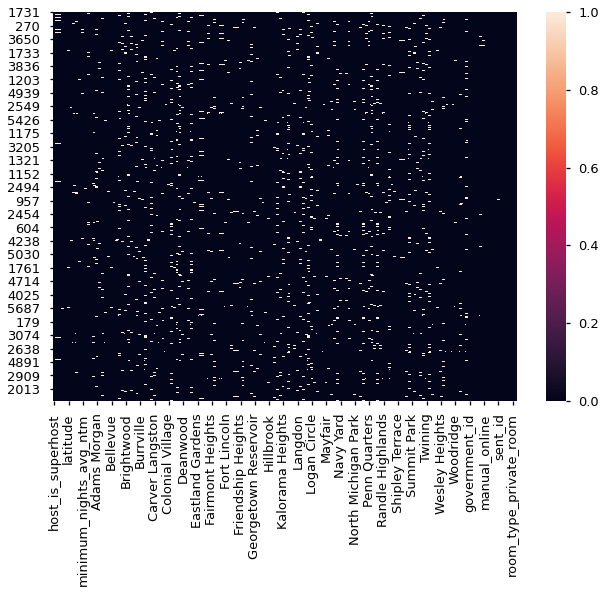

In [115]:
## Heatmap to visualize presence/absence of outliers
idx_train = (np.abs(X_train_tf_df) >= 3)
sns.heatmap(idx_train)

In [116]:
## Looking at the min/max values to ID extreme z-scores

X_train_tf_df.describe().loc[['min','50%', 'max']]

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,instant_bookable,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,room_type_entire_home,room_type_hotel_room,room_type_private_room,room_type_shared_room
min,-0.71,-0.21,-0.21,-26.94,-2.13,-3.74,-3.18,-0.57,-1.30,-0.62,-0.18,-0.07,-7.01,-0.76,-1.90,-0.21,-0.11,-0.17,-0.09,-0.07,-0.11,-0.08,-0.10,-0.28,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,-0.17,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,-0.29,-0.25,-0.08,-0.06,-0.19,-0.29,-0.08,-0.04,-0.28,-0.28,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,-0.17,-0.21,-0.04,-0.33,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,-0.33,-0.06,-0.15,-0.11,-0.17,-0.28,-0.11,-0.33,-0.11,-0.08,-0.11,-0.10,-0.18,-0.11,-0.03,-0.11,-0.08,0.00,-4.45,-0.44,-0.29,-1.28,-0.56,-0.89,-0.61,-0.13,-0.09,-0.90,-21.99,-1.71,-0.61,-0.03,-0.02,-0.51,0.00,0.00,0.00,0.00
50%,-0.71,-0.20,-0.20,0.04,0.47,-0.01,-0.07,-0.57,-0.62,-0.18,-0.16,-0.07,0.14,-0.76,-0.48,-0.21,-0.11,-0.17,-0.09,-0.07,-0.11,-0.08,-0.10,-0.28,-0.14,-0.15,-0.25,-0.14,-0.07,-0.18,-0.08,-0.11,-0.32,-0.10,-0.20,-0.17,-0.11,-0.09,-0.19,-0.11,-0.06,-0.32,-0.11,-0.29,-0.25,-0.08,-0.06,-0.19,-0.29,-0.08,-0.04,-0.28,-0.28,-0.06,-0.11,-0.08,-0.18,-0.08,-0.11,-0.11,-0.08,-0.11,-0.11,-0.10,-0.10,-0.11,-0.18,-0.03,-0.08,-0.18,-0.10,-0.11,-0.08,-0.08,-0.09,-0.08,-0.06,-0.10,-0.20,-0.17,-0.21,-0.04,-0.33,-0.03,-0.11,-0.14,-0.21,-0.20,-0.08,-0.32,-0.27,-0.08,-0.15,-0.10,-0.11,-0.08,-0.11,-0.11,-0.19,-0.32,-0.08,-0.06,-0.08,-0.19,-0.08,-0.11,-0.06,-0.10,-0.32,-0.11,-0.19,-0.25,-0.11,-0.32,-0.11,-0.11,-0.08,-0.27,-0.06,-0.07,-0.06,-0.11,-0.11,-0.10,-0.33,-0.06,-0.15,-0.11,-0.17,-0.28,-0.11,-0.33,

In [117]:
X_train_tf_df.describe().loc[['min','50%', 'max']].max()

host_is_superhost           1.41
host_listings_count         7.91
host_total_listings_count   7.91
host_has_profile_pic        0.04
host_identity_verified      0.47
                            ... 
work_email                  1.97
room_type_entire_home       1.00
room_type_hotel_room        1.00
room_type_private_room      1.00
room_type_shared_room       1.00
Length: 162, dtype: float64

host_is_superhost           1.41
host_listings_count         7.91
host_total_listings_count   7.91
host_has_profile_pic        0.04
host_identity_verified      0.47
                            ... 
work_email                  1.97
room_type_entire_home       1.00
room_type_hotel_room        1.00
room_type_private_room      1.00
room_type_shared_room       1.00
Length: 162, dtype: float64

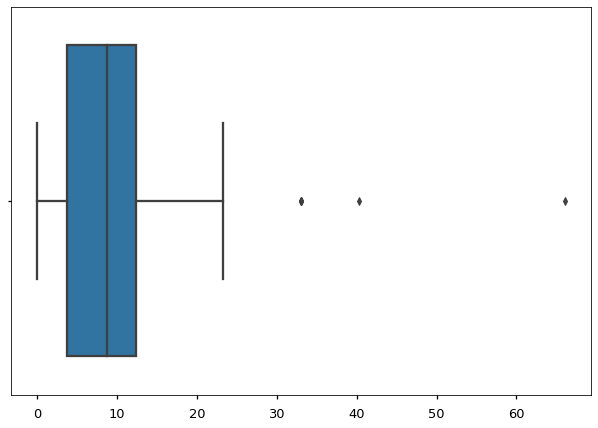

In [118]:
## Visualizing max values for each feature

display(X_train_tf_df.describe().loc[['min','50%', 'max']].max())

sns.boxplot(x=X_train_tf_df.describe().loc[['min','50%', 'max']].max());

host_is_superhost            -0.71
host_listings_count          -0.21
host_total_listings_count    -0.21
host_has_profile_pic        -26.94
host_identity_verified       -2.13
                             ...  
work_email                   -0.51
room_type_entire_home         0.00
room_type_hotel_room          0.00
room_type_private_room        0.00
room_type_shared_room         0.00
Length: 162, dtype: float64

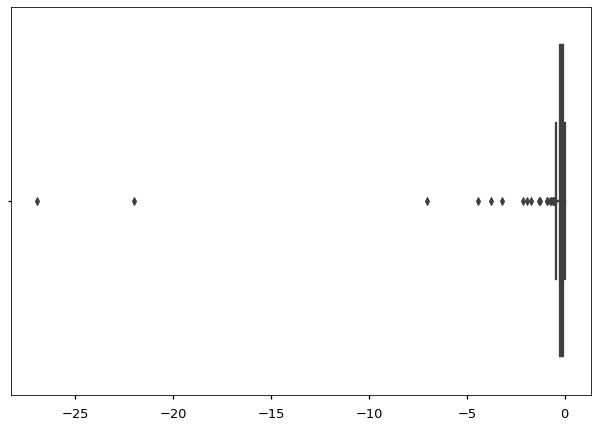

In [119]:
## Visualizing min values for each feature

display(X_train_tf_df.describe().loc[['min','50%', 'max']].min())

sns.boxplot(x=X_train_tf_df.describe().loc[['min','50%', 'max']].min());

## Next Step

Goal: ID features with extreme z-scores

# Baseline Model


|---------------- Classification Results -------------------------------------------------|

Training accuracy score: 0.93

Testing accuracy score: 0.92

	The training score is larger by 0.01 points.


Training Data Log Loss: 2.91

	The log loss for the training data is high, indicating a poorly-performing model.

Testing Data Log Loss: 2.68

	The log loss for the testing data is high, indicating a poorly-performing model.


|---------------- Classification Report - Training Data ----------------------------------|

              precision    recall  f1-score   support

           0       0.02      0.02      0.02       181
           1       0.96      0.96      0.96      4181

    accuracy                           0.92      4362
   macro avg       0.49      0.49      0.49      4362
weighted avg       0.92      0.92      0.92      4362



|---------------- Classification Report  - Testing Data ----------------------------------|

              precision    recall  f1-score   support



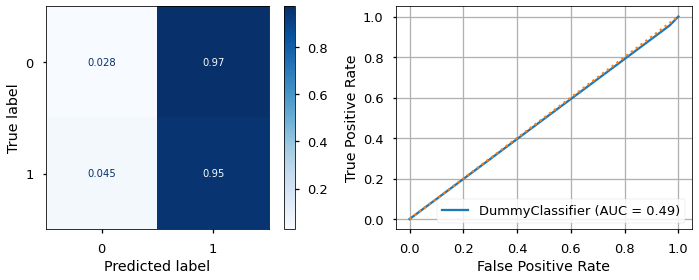


|---------------- Classification Visualizations - Testing Data ---------------------------|



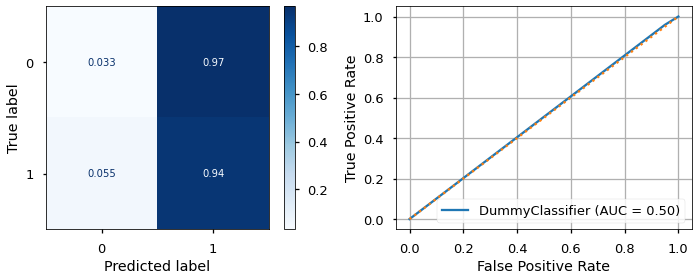

In [135]:
## Creating baseline classifier model

clf = DummyClassifier(strategy='stratified')

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf,X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test, 
                           model_scoring_metric = 'accuracy',)

#  Classification Models

---

**Interpretation**

> High log loss, very poor AUC (worse than random chance).

---

In [ ]:
clf = LogisticRegression(max_iter=350, n_jobs=-1, class_weight='balanced')

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf, X_test_tf_df, y_test, X_train = X_train_tf_df,
                        y_train = y_train)

---

**Interpretation**

> Log loss decreased by 2.24 and AUC increased by .21, but still room for improvement

---

# KNN Model

# Decision Tree Model

# SVM/SVC Model

# RandomForestClassifier

# GridSearchCV

# Gradient Boosting